In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
msambare_fer2013_path = kagglehub.dataset_download('msambare/fer2013')

print('Data source import complete.')


Data source import complete.


In [ ]:
msambare_fer2013_path

'/kaggle/input/fer2013'

In [ ]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import imghdr
import tensorflow as tf
from PIL import Image
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.utils.class_weight import compute_class_weight

from tensorflow.keras import layers, models, regularizers, optimizers
from tensorflow.keras.applications import VGG16, ResNet50V2
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TensorBoard, CSVLogger
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense, Activation, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.utils import plot_model

<ipython-input-2-f974e7c6f38b>:7: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


# Setting up Directory to Save Model Data

In [ ]:
project_name = 'FER_2013_Emotion_Detection'

model_names = [
    'Custom_CNN_From_Scratch',
    'Custom_CNN_With_Augmentation',
    'VGG16_Transfer_Learning',
    'ResNet50_Transfer_Learning'
]

base_dir = '/content/'

project_dir = os.path.join(base_dir,project_name)
os.makedirs(project_dir , exist_ok = True)

for i in model_names:
    a = os.path.join(project_dir,i)
    os.makedirs(a , exist_ok=True)

print(project_dir)

/content/FER_2013_Emotion_Detection




```
# This is formatted as code
```

# Data Cleaning

In [ ]:
import imghdr
import cv2

img_format = ['jpeg','jpg','png']

for root,dir,files in os.walk("/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1"):
    for file in files:
        file_path = os.path.join(root,file)
        try:
            if imghdr.what(file_path) not in img_format:
                os.remove(file_path)
                print("Succesfully Removed file {}".format(file_path))
            else:
                img = cv2.imread(file_path)
        except Exception as e:
            print("Issue with file {}".format(file_path))
            os.remove(file_path)

# Data Analysis

In [ ]:
hash = {}
hash['angry'] = len(os.listdir('/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train/angry'))
hash['disgust'] = len(os.listdir('/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train/disgust'))
hash['fear'] = len(os.listdir('/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train/fear'))
hash['happy'] = len(os.listdir('/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train/happy'))
hash['neutral'] = len(os.listdir('/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train/neutral'))
hash['sad'] = len(os.listdir('/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train/sad'))
hash['surprise'] = len(os.listdir('/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train/surprise'))
print(hash)

hash_1 ={}
hash_1['angry'] = len(os.listdir('/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/test/angry'))
hash_1['disgust'] = len(os.listdir('/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/test/disgust'))
hash_1['fear'] = len(os.listdir('/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/test/fear'))
hash_1['happy'] = len(os.listdir('/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/test/happy'))
hash_1['neutral'] = len(os.listdir('/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/test/neutral'))
hash_1['sad'] = len(os.listdir('/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/test/sad'))
hash_1['surprise'] = len(os.listdir('/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/test/surprise'))
hash_1

FileNotFoundError: [Errno 2] No such file or directory: '/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train/angry'

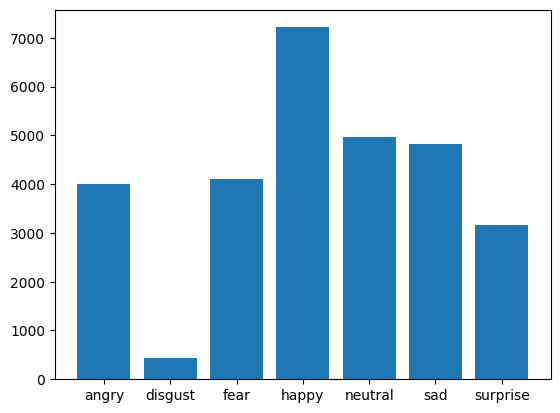

In [ ]:
import plotly.express as px
plt.bar(list(hash.keys()) , list(hash.values()))
plt.show()

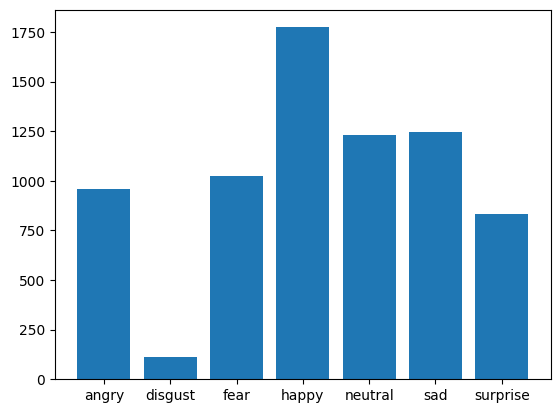

In [ ]:
plt.bar(list(hash_1.keys()) , list(hash_1.values()))
plt.show()

## Plotting one image from each emotion

In [ ]:
folders = os.listdir('/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train')
base_dir = '/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train'

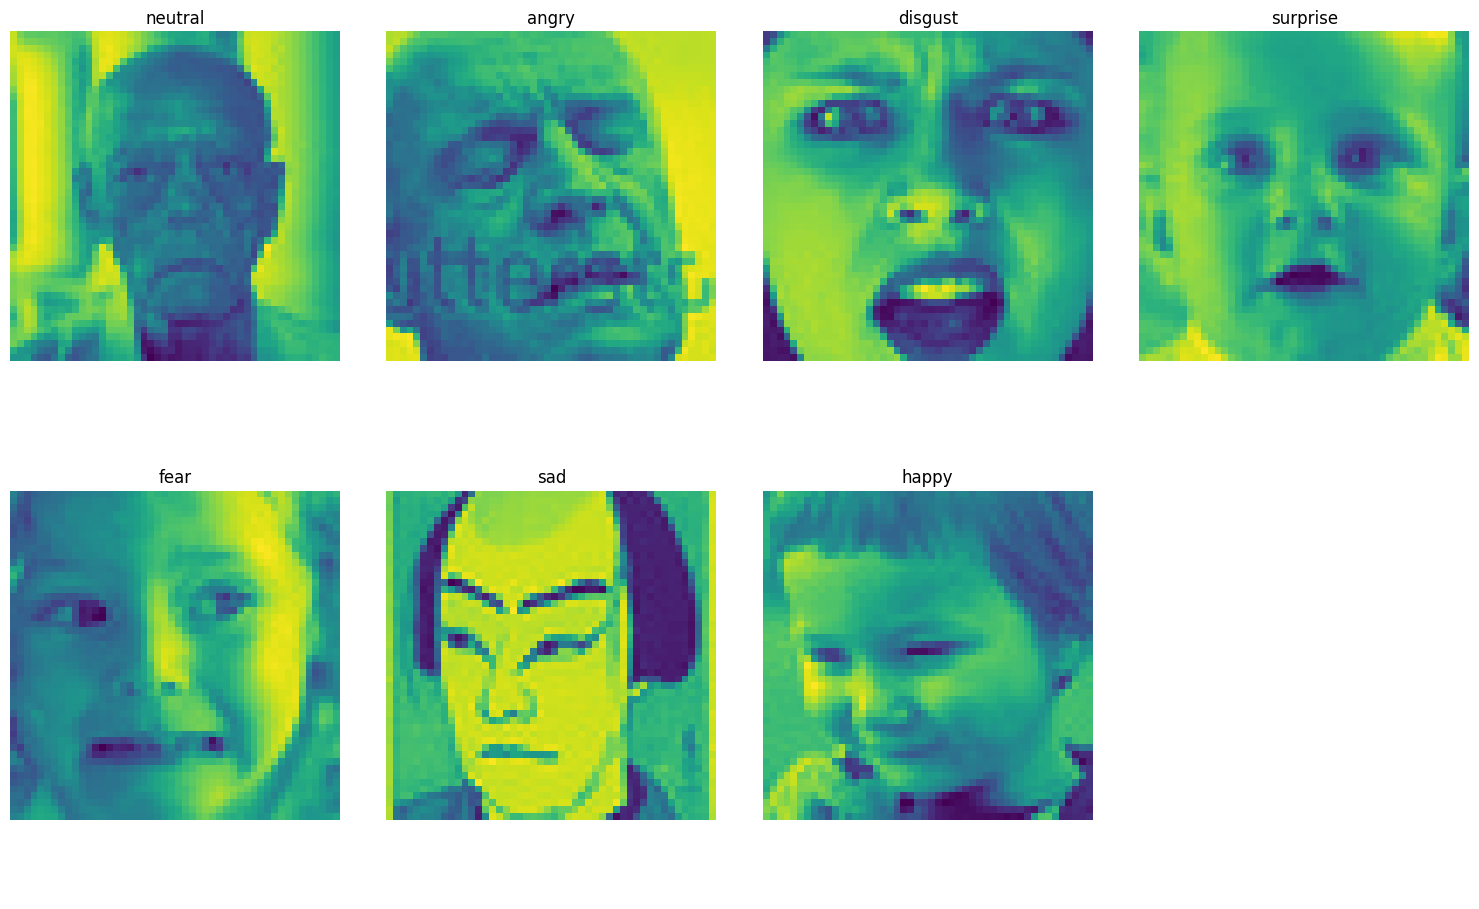

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(15, 10))
axes = axes.flatten()

for i, folder in enumerate(folders):
    folder_dir = os.path.join(base_dir, folder)
    img_path = os.path.join(folder_dir, os.listdir(folder_dir)[i])
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    axes[i].imshow(img)
    axes[i].set_title('{}'.format(folder))
    axes[i].axis('off')

plt.tight_layout()
plt.axis('off')
plt.show()


## Plotting random images from given directory

In [ ]:
def show_imgs(dic_path,classs, no_img = 9):
    x = random.sample(os.listdir(dic_path), no_img)
    fig , axs = plt.subplots(3,3, figsize = (5,5))
    axs = axs.flatten()
    for ind,i in enumerate(x):
        img = os.path.join(dic_path,i)
        image = cv2.imread(img, cv2.IMREAD_GRAYSCALE)

        axs[ind].imshow(image)
        axs[ind].set_title("Image: {}".format(classs))
        axs[ind].axis('off')


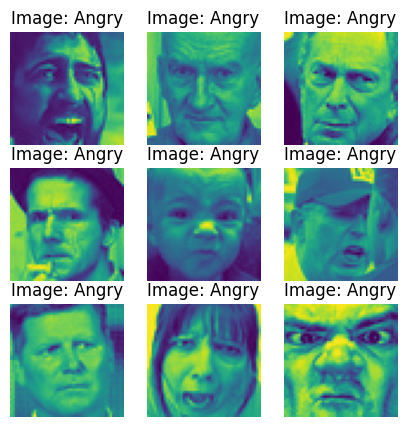

In [ ]:
show_imgs('/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train/angry',classs = 'Angry')

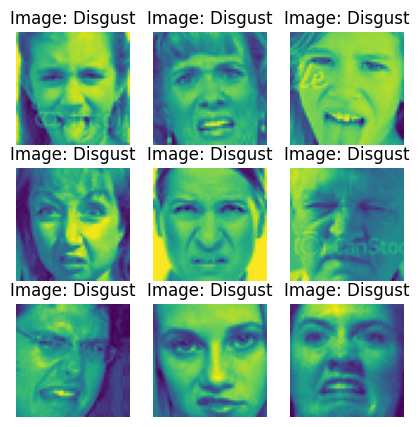

In [ ]:
show_imgs('/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train/disgust',classs = 'Disgust')

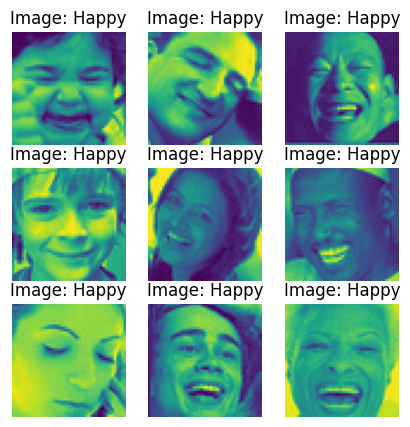

In [ ]:
show_imgs('/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train/happy',classs = 'Happy')

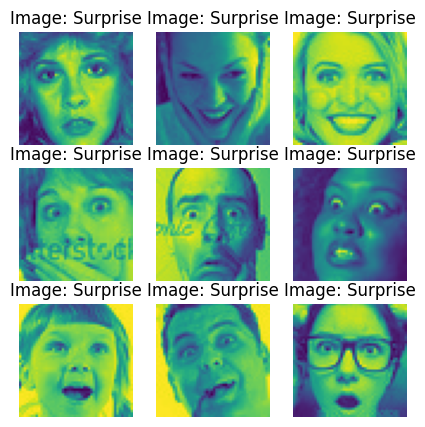

In [ ]:
show_imgs('/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train/surprise',classs = 'Surprise')

## Checking shapes and channels.

In [ ]:
img = cv2.imread("/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train/angry/Training_10118481.jpg", cv2.IMREAD_GRAYSCALE)

if img is not None:
    print(img.shape)
else:
    print("no img")

(48, 48)


# Model 1 : Custom CNN from Scratch

## Initializing the ImageGenerators


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255 , validation_split = 0.2)

train_gen = train_datagen.flow_from_directory(
    "/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train",
    target_size = (48,48),
    batch_size = 64,
    subset = "training",
    class_mode = 'categorical',
    color_mode = "grayscale"
)

val_gen = train_datagen.flow_from_directory(
    "/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train",
    target_size = (48,48),
    batch_size = 64,
    subset = "validation",
    class_mode = 'categorical',
    color_mode = "grayscale"
)

test_gen = train_datagen.flow_from_directory(
    "/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/test",
    target_size = (48,48),
    batch_size = 64,
    #subset = "validation",
    class_mode = 'categorical',
    color_mode = "grayscale"
)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
print("train : ",train_gen.class_indices)
print("val   : ",val_gen.class_indices)
print("test  : ",test_gen.class_indices)

train :  {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
val   :  {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
test  :  {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size = (3,3),padding = 'same', kernel_initializer="glorot_uniform", input_shape = (48,48,1)))
model.add(Activation('relu'))
model.add(Conv2D(64,kernel_size = (3,3),padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())  # again normalization
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))        # 25% value will be zero , because some blocks are contain same values after maxpooling.

model.add(Conv2D(128,kernel_size = (3,3),padding = 'same', kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))
model.add(Conv2D(256,kernel_size = (3,3), kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(512,kernel_size = (3,3),padding = 'same', kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))
model.add(Conv2D(512,kernel_size = (3,3),padding = 'same', kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024))
model.add(Dropout(0.5))

#output layer
model.add(Dense(7))
model.add(Activation('softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 48, 48, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 22, 22, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 22, 22, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 22, 22, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 11, 11, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 11, 11, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 11, 11, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 11, 11, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 11, 11, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 5, 5, 512)           │              

 Total params: 17,046,535 (65.03 MB)

 Trainable params: 17,044,871 (65.02 MB)

 Non-trainable params: 1,664 (6.50 KB)

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics = ['accuracy'])

# Understanding Callbacks

In [ ]:
cnn_path = "/content/FER_2013_Emotion_Detection/Custom_CNN_From_Scratch"
name = 'Custom_CNN_model.keras'
chk_path = os.path.join(cnn_path, name)
chk_path

'/content/FER_2013_Emotion_Detection/Custom_CNN_From_Scratch/Custom_CNN_model.keras'

In [ ]:
# Callback to save the model checkpoint
checkpoint = ModelCheckpoint(filepath = chk_path,  # If model is improve it will be save in this file.
                             save_best_only = True,
                             verbose = 1,
                             mode = 'min',
                             monitor = 'val_loss'
                            )

In [ ]:
earlystop = EarlyStopping(monitor = 'val_loss',
                           min_delta = 0,  # need model improvement more than 0 (>0).
                           patience = 3,  # 3 epoch tak wait karega improvement ka , agar 3 epoch tak model improve nhi hoga to stop.
                           verbose = 1,
                           restore_best_weights = True  # agar 3 epoch tak model improve nahi hua, to 3 epoch pehle ke improved weights ko restore karega.
                          )


In [ ]:
# Callback to reduce learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor = 0.2, # learning rate kitna kam karna hai.(reduce 20%)
                              patience=3,
                              min_delta = 0.0001, # need model improvement more than 0.0001 (>0.0001)
                              verbose = 1
                             )

In [ ]:
# Callback to log training data to a CSV file
csv_logger = CSVLogger(os.path.join(cnn_path,'training.log'))

In [ ]:
callbacks = [checkpoint, earlystop, reduce_lr, csv_logger]

In [ ]:
step_per_epoch = train_gen.samples//train_gen.batch_size+1
val_step = val_gen.samples//val_gen.batch_size+1
test_steps = test_gen.samples//test_gen.batch_size+1

In [ ]:
fit = model.fit(train_gen,
          epochs = 10,
          validation_data = val_gen,
          callbacks=callbacks
         )

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.2333 - loss: 16.8244
Epoch 1: val_loss improved from inf to 13.04943, saving model to /content/FER_2013_Emotion_Detection/Custom_CNN_From_Scratch/Custom_CNN_model.keras
359/359 ━━━━━━━━━━━━━━━━━━━━ 55s 105ms/step - accuracy: 0.2334 - loss: 16.8206 - val_accuracy: 0.2573 - val_loss: 13.0494 - learning_rate: 1.0000e-04
Epoch 2/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.2995 - loss: 13.0690
Epoch 2: val_loss improved from 13.04943 to 11.12104, saving model to /content/FER_2013_Emotion_Detection/Custom_CNN_From_Scratch/Custom_CNN_model.keras
359/359 ━━━━━━━━━━━━━━━━━━━━ 24s 68ms/step - accuracy: 0.2996 - loss: 13.0671 - val_accuracy: 0.3628 - val_loss: 11.1210 - learning_rate: 1.0000e-04
Epoch 3/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.3744 - loss: 10.8316
Epoch 3: val_loss improved from 11.12104 to 9.98631, saving model to /content/FER_2013_Emotion_Detection/Custom_CNN_From_Scratch/Custom_CNN_model.k

In [ ]:
fit.history['val_loss']

[13.04942512512207,
 11.121039390563965,
 9.986310005187988,
 8.547532081604004,
 7.335379600524902,
 6.309860706329346,
 5.366341590881348,
 4.620945930480957,
 3.9591691493988037,
 3.522385358810425]

In [ ]:
train_acc = fit.history['accuracy']
val_acc = fit.history['val_accuracy']

train_loss = fit.history['loss']
val_loss = fit.history['val_loss']

epochs = np.arange(1,len(train_acc)+1)

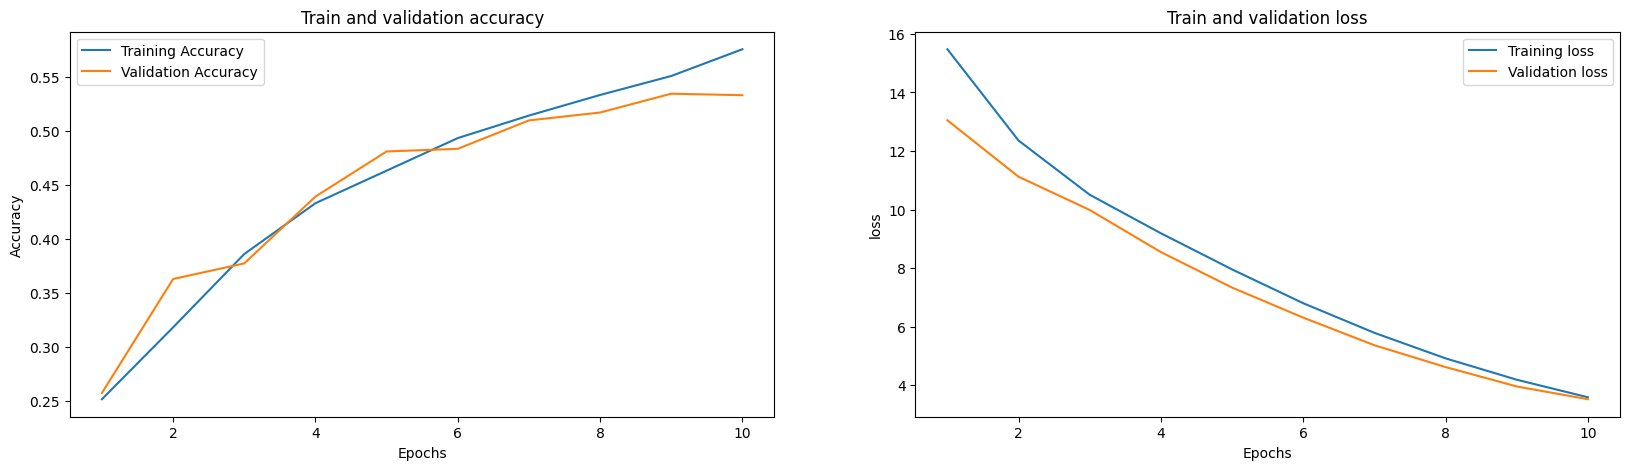

In [ ]:
fig , axes = plt.subplots(1,2, figsize = (20,5))
axes = axes.flatten()

axes[0].plot(epochs, train_acc, label = 'Training Accuracy')
axes[0].plot(epochs, val_acc, label = 'Validation Accuracy')
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Accuracy")
axes[0].set_title("Train and validation accuracy")
axes[0].legend()

axes[1].plot(epochs, train_loss, label = 'Training loss')
axes[1].plot(epochs, val_loss, label = 'Validation loss')
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("loss")
axes[1].set_title("Train and validation loss")
axes[1].legend()

plt.show()

In [ ]:
train_loss , train_acc = model.evaluate(train_gen)
test_loss , test_acc = model.evaluate(test_gen)
print("Train Accuracy : {} ".format(train_acc*100))
print("Test Accuracy : {} ".format(test_acc*100))

359/359 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.6214 - loss: 3.2642
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.5269 - loss: 3.5186
Train Accuracy : 61.89481019973755 
Test Accuracy : 53.17637324333191 


113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step


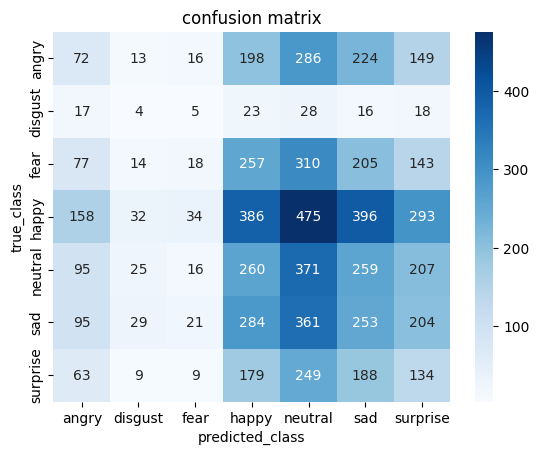

In [ ]:
predicted_class = np.argmax(model.predict(test_gen , steps = test_steps), axis = 1)  # axis = 1 find row-wise max value index
true_class = test_gen.classes
class_label = train_gen.class_indices.keys()

cm = confusion_matrix(true_class,predicted_class)

sns.heatmap(cm , cmap = 'Blues', annot = True, fmt = "d", xticklabels = class_label, yticklabels = class_label)
plt.title("confusion matrix")
plt.xlabel("predicted_class")
plt.ylabel("true_class")
plt.show()


In [ ]:
report = classification_report(true_class,predicted_class , target_names = class_label)
print(report)


              precision    recall  f1-score   support

       angry       0.12      0.08      0.09       958
     disgust       0.03      0.04      0.03       111
        fear       0.15      0.02      0.03      1024
       happy       0.24      0.22      0.23      1774
     neutral       0.18      0.30      0.22      1233
         sad       0.16      0.20      0.18      1247
    surprise       0.12      0.16      0.14       831

    accuracy                           0.17      7178
   macro avg       0.14      0.14      0.13      7178
weighted avg       0.17      0.17      0.16      7178



In [ ]:
folders = os.listdir('/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/test')
base_dir = '/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/test'

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


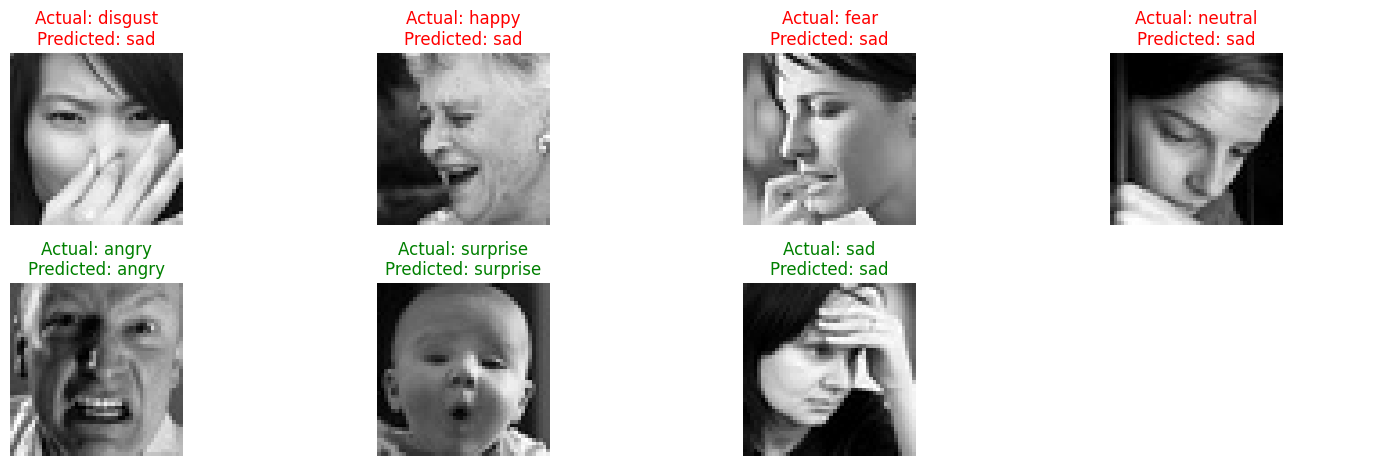

In [ ]:
hash = {0:"angry",1:"disgust",2:"fear",3:"happy",4:"neutral",5:"sad",6:"surprise"}
fig , axes = plt.subplots(2,4,figsize = (15,5))
axes = axes.flatten()

for i,folder in enumerate(folders):
  folder_path = os.path.join(base_dir,folder)
  img_path = os.path.join(folder_path,os.listdir(folder_path)[i+12])
  img = load_img(img_path, target_size = (48,48),color_mode="grayscale")
  imd = img_to_array(img)
  img = np.expand_dims(img, axis = 0)
  img = img/255

  pred = np.argmax(model.predict(img))
  if pred in hash:
    pred = hash[pred]

  axes[i].imshow(img[0], cmap="gray")

  if pred == folder:
    color = 'green'
  else:
    color = 'red'

  axes[i].set_title("Actual: {}\nPredicted: {}".format(folder, pred),color = color)
  axes[i].axis('off')

plt.tight_layout()
plt.axis('off')
plt.show()


# Model 2: Image Data Augmentation

In [ ]:
train_datagen2 = ImageDataGenerator(rescale = 1/255 ,
                                    rotation_range=40,  # Degree range for random rotations
                                    width_shift_range=0.2,  # Range (as a fraction of total width) for random horizontal shifts
                                    height_shift_range=0.2,  # Range (as a fraction of total height) for random vertical shifts
                                    shear_range=0.2,  # Shearing intensity (shear angle in counter-clockwise direction)
                                    zoom_range=0.2,  # Range for random zoom
                                    horizontal_flip=True,  # Randomly flip inputs horizontally
                                    fill_mode='nearest',  # Strategy to fill newly created pixels, which can appear after a rotation or a width/height shift
                                    validation_split =  0.2)

train_gen2 = train_datagen2.flow_from_directory(
    "/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train",
    batch_size = 64,
    target_size = (48,48),
    subset = "training",
    class_mode = 'categorical',
    color_mode = "grayscale"
)

val_gen2 = train_datagen2.flow_from_directory(
    "/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train",
    batch_size = 64,
    target_size = (48,48),
    subset = "validation",
    class_mode = 'categorical',
    color_mode = "grayscale"
)

test_datagen = ImageDataGenerator(rescale = 1/255)

test_gen2 = test_datagen.flow_from_directory(
    "/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/test",
    target_size = (48,48),
    class_mode = "categorical",
    color_mode = "grayscale",
    batch_size = 64
)


Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


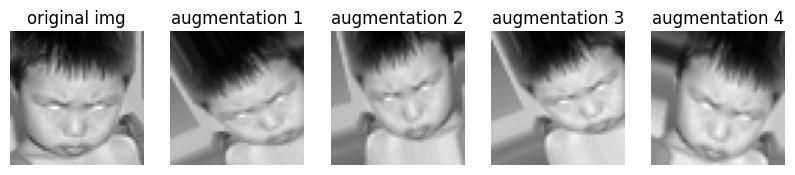

In [ ]:
img_path = "/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train/angry/Training_10118481.jpg"

img = load_img(img_path, target_size = (48,48), color_mode = "grayscale")
img = img_to_array(img)
img = np.expand_dims(img , axis = 0)
img_array = img / 255

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 4))
axes = axes.flatten()

axes[0].imshow(img[0], cmap = 'gray')
axes[0].set_title("original img")
axes[0].axis('off')

for i in range(1,5):
  img = train_datagen2.flow(img_array, batch_size = 1)
  img = next(img)[0]

  axes[i].imshow(img, cmap = "gray")
  axes[i].set_title("augmentation {}".format(i))
  axes[i].axis('off')

# Same CNN Model as above

In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size = (3,3),padding = 'same', kernel_initializer="glorot_uniform", input_shape = (48,48,1)))
model.add(Activation('relu'))
model.add(Conv2D(64,kernel_size = (3,3),padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())  # again normalization
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))        # 25% value will be zero , because some blocks are contain same values after maxpooling.

model.add(Conv2D(128,kernel_size = (3,3),padding = 'same', kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))
model.add(Conv2D(256,kernel_size = (3,3), kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(512,kernel_size = (3,3),padding = 'same', kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))
model.add(Conv2D(512,kernel_size = (3,3),padding = 'same', kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024))
model.add(Dropout(0.5))

#output layer
model.add(Dense(7))
model.add(Activation('softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics = ['accuracy'])
cnn_path = "/content/FER_2013_Emotion_Detection/Custom_CNN_With_Augmentation"
name = 'Custom_CNN_augmented_model.keras'
chk_path = os.path.join(cnn_path, name)
chk_path

'/content/FER_2013_Emotion_Detection/Custom_CNN_With_Augmentation/Custom_CNN_augmented_model.keras'

In [ ]:
check_point = ModelCheckpoint(monitor = 'val_loss',
                              mode = "min",
                              filepath = chk_path,
                              save_best_only = True,
                              verbose = 1
                              )

earlystop = EarlyStopping(monitor = "val_loss",
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = "val_loss",
                              min_delta = 0.0001,
                              factor = 0.2,
                              patience = 3,
                              verbose = 1)

csvlogger = CSVLogger(os.path.join(cnn_path,"training.log"))

callbacks = [check_point, earlystop, reduce_lr, csvlogger]

fit2 = model.fit(train_gen2,
          epochs = 100,
          validation_data = val_gen2,
          callbacks=callbacks
         )

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.1826 - loss: 17.1473
Epoch 1: val_loss improved from inf to 15.06730, saving model to /content/FER_2013_Emotion_Detection/Custom_CNN_With_Augmentation/Custom_CNN_augmented_model.keras
359/359 ━━━━━━━━━━━━━━━━━━━━ 45s 100ms/step - accuracy: 0.1826 - loss: 17.1439 - val_accuracy: 0.1427 - val_loss: 15.0673 - learning_rate: 1.0000e-04
Epoch 2/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.2023 - loss: 13.2703
Epoch 2: val_loss improved from 15.06730 to 11.19048, saving model to /content/FER_2013_Emotion_Detection/Custom_CNN_With_Augmentation/Custom_CNN_augmented_model.keras
359/359 ━━━━━━━━━━━━━━━━━━━━ 69s 80ms/step - accuracy: 0.2023 - loss: 13.2679 - val_accuracy: 0.2493 - val_loss: 11.1905 - learning_rate: 1.0000e-04
Epoch 3/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.2252 - loss: 10.8786
Epoch 3: val_loss improved from 11.19048 to 9.87148, saving model to /content/FER_2013_Emotion_Detection/Custom_CNN

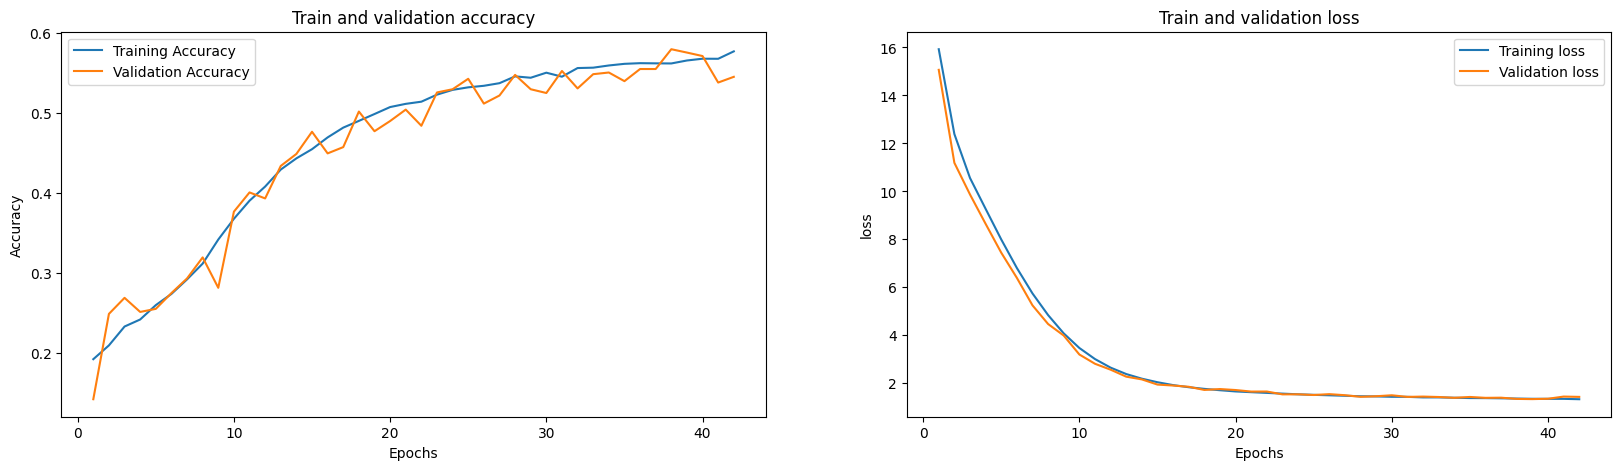

359/359 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - accuracy: 0.5943 - loss: 1.2829
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.5960 - loss: 1.2854
Train Accuracy : 59.50888395309448 
Test Accuracy : 59.79381203651428 


In [ ]:
train_acc = fit2.history['accuracy']
val_acc = fit2.history['val_accuracy']

train_loss = fit2.history['loss']
val_loss = fit2.history['val_loss']

epochs = np.arange(1,len(train_acc)+1)

fig , axes = plt.subplots(1,2, figsize = (20,5))
axes = axes.flatten()

axes[0].plot(epochs, train_acc, label = 'Training Accuracy')
axes[0].plot(epochs, val_acc, label = 'Validation Accuracy')
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Accuracy")
axes[0].set_title("Train and validation accuracy")
axes[0].legend()

axes[1].plot(epochs, train_loss, label = 'Training loss')
axes[1].plot(epochs, val_loss, label = 'Validation loss')
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("loss")
axes[1].set_title("Train and validation loss")
axes[1].legend()

plt.show()


train_loss , train_acc = model.evaluate(train_gen2)
test_loss , test_acc = model.evaluate(test_gen2)
print("Train Accuracy : {} ".format(train_acc*100))
print("Test Accuracy : {} ".format(test_acc*100))

113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step


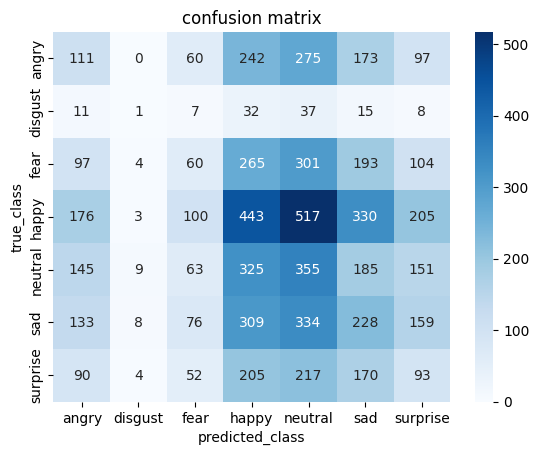

In [ ]:
step_per_epoch = train_gen2.samples//train_gen2.batch_size+1
val_step = val_gen2.samples//val_gen2.batch_size+1
test_steps = test_gen2.samples//test_gen2.batch_size+1

predicted_class = np.argmax(model.predict(test_gen2 , steps = test_steps), axis = 1)  # axis = 1 find row-wise max value index
true_class = test_gen2.classes
class_label = train_gen2.class_indices.keys()

cm = confusion_matrix(true_class,predicted_class)

sns.heatmap(cm , cmap = 'Blues', annot = True, fmt = "d", xticklabels = class_label, yticklabels = class_label)
plt.title("confusion matrix")
plt.xlabel("predicted_class")
plt.ylabel("true_class")
plt.show()


In [ ]:
report = classification_report(true_class,predicted_class , target_names = class_label)
print(report)


              precision    recall  f1-score   support

       angry       0.15      0.12      0.13       958
     disgust       0.03      0.01      0.01       111
        fear       0.14      0.06      0.08      1024
       happy       0.24      0.25      0.25      1774
     neutral       0.17      0.29      0.22      1233
         sad       0.18      0.18      0.18      1247
    surprise       0.11      0.11      0.11       831

    accuracy                           0.18      7178
   macro avg       0.15      0.15      0.14      7178
weighted avg       0.17      0.18      0.17      7178



# Model 3: Transfer Learning VGGNET

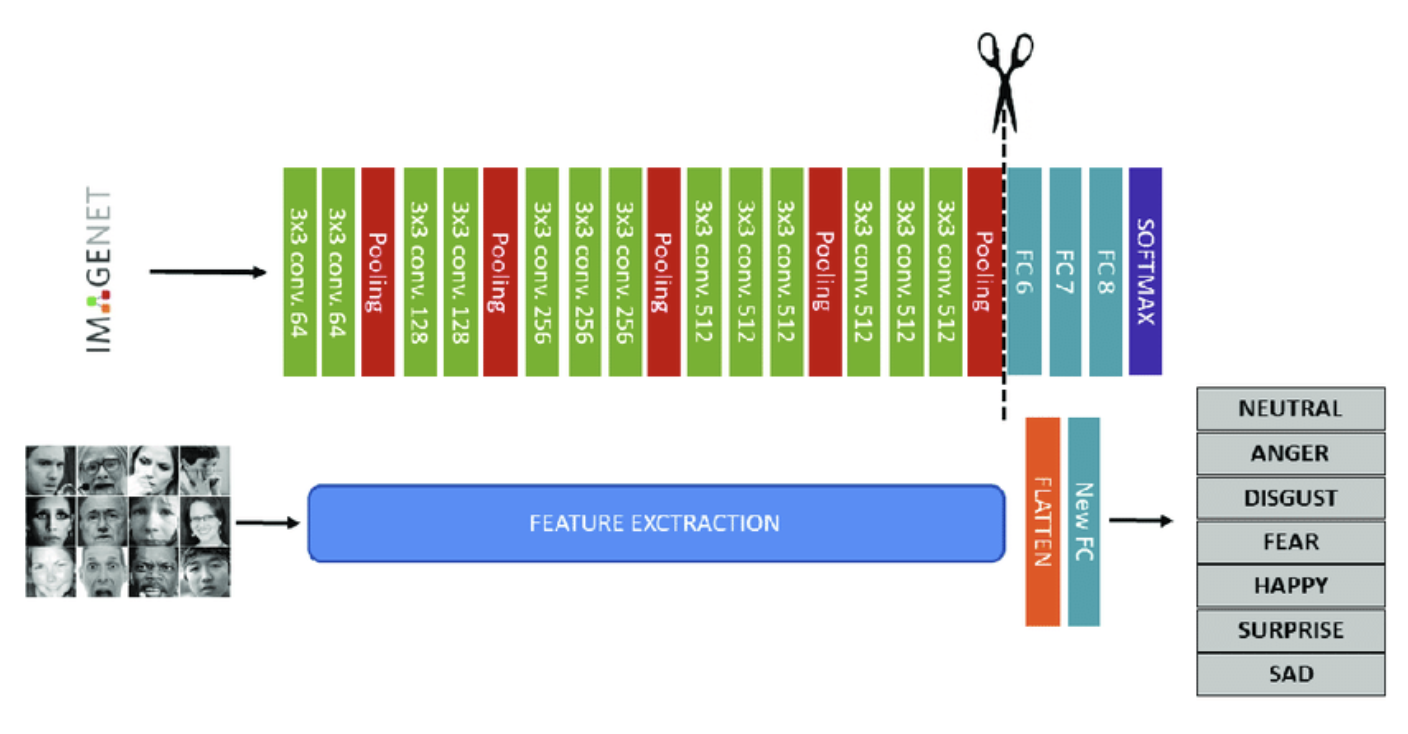

In [ ]:
train_datagen3 = ImageDataGenerator(rescale = 1/255 ,
                                    rotation_range=40,  # Degree range for random rotations
                                    width_shift_range=0.2,  # Range (as a fraction of total width) for random horizontal shifts
                                    height_shift_range=0.2,  # Range (as a fraction of total height) for random vertical shifts
                                    shear_range=0.2,  # Shearing intensity (shear angle in counter-clockwise direction)
                                    zoom_range=0.2,  # Range for random zoom
                                    horizontal_flip=True,  # Randomly flip inputs horizontally
                                    fill_mode='nearest',  # Strategy to fill newly created pixels, which can appear after a rotation or a width/height shift
                                    )

train_gen3 = train_datagen3.flow_from_directory(
    "/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train",
    batch_size = 64,
    target_size = (224,224),
    subset = "training",
    class_mode = 'categorical',
    color_mode = "rgb",
    shuffle = True
)

test_datagen3 = ImageDataGenerator(rescale = 1/255)

test_gen3 = test_datagen3.flow_from_directory(
    "/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/test",
    target_size = (224,224),
    class_mode = "categorical",
    color_mode = "rgb",
    batch_size = 64
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
classes = train_gen3.classes

class_weights = compute_class_weight(class_weight = "balanced",
                                     classes = np.unique(classes),
                                     y = classes)

class_dict = dict(enumerate(class_weights))
class_dict

{0: 1.0266046844269623,
 1: 9.406618610747051,
 2: 1.0010460615781582,
 3: 0.5684387684387684,
 4: 0.8260394187886635,
 5: 0.8491274770777877,
 6: 1.293372978330405}

In [ ]:
tf.keras.backend.clear_session()

vgg = VGG16(input_shape = (224,224,3),
            include_top = False,
            weights = 'imagenet')

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
vgg.layers[:-3]

[<InputLayer name=input_layer, built=True>,
 <Conv2D name=block1_conv1, built=True>,
 <Conv2D name=block1_conv2, built=True>,
 <MaxPooling2D name=block1_pool, built=True>,
 <Conv2D name=block2_conv1, built=True>,
 <Conv2D name=block2_conv2, built=True>,
 <MaxPooling2D name=block2_pool, built=True>,
 <Conv2D name=block3_conv1, built=True>,
 <Conv2D name=block3_conv2, built=True>,
 <Conv2D name=block3_conv3, built=True>,
 <MaxPooling2D name=block3_pool, built=True>,
 <Conv2D name=block4_conv1, built=True>,
 <Conv2D name=block4_conv2, built=True>,
 <Conv2D name=block4_conv3, built=True>,
 <MaxPooling2D name=block4_pool, built=True>,
 <Conv2D name=block5_conv1, built=True>]

In [ ]:
# Make the specified layers non-trainable
for layer in vgg.layers[:-3]:
    layer.trainable = False

vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 4,719,616 (18.00 MB)

 Non-trainable params: 9,995,072 (38.13 MB)

In [ ]:
vgg.layers[-1].trainable

True

In [ ]:
x = Flatten()(vgg.output)
x = Dense(1024 , activation = 'relu', kernel_initializer='he_normal')(x)
x = Dropout(0.5)(x)

x = Dense(512, activation='relu', kernel_initializer='he_normal')(x)
x = Dropout(0.5)(x)

output = Dense(7, activation='softmax', kernel_initializer='he_normal')(x)

# Creating the model
model = Model(inputs=vgg.input, outputs=output)

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False),
              metrics=['accuracy'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │      25,691,136 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 40,934,215 (156.15 MB)

 Trainable params: 30,939,143 (118.02 MB)

 Non-trainable params: 9,995,072 (38.13 MB)

In [ ]:
cnn_path = '/content/FER_2013_Emotion_Detection/VGG16_Transfer_Learning'
name = 'VGG16_Transfer_Learning.keras'
chk_path = os.path.join(cnn_path, name)

# Callback to save the model checkpoint
checkpoint = ModelCheckpoint(filepath=chk_path,
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             monitor='val_loss')

# Callback for early stopping
earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True)

# Callback to reduce learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=6,
                              verbose=1,
                              min_delta=0.0001)

# Callback to log training data to a CSV file
csv_logger = CSVLogger(os.path.join(cnn_path,'training.log'))

# Aggregating all callbacks into a list
callbacks = [checkpoint, earlystop, reduce_lr, csv_logger]

step_per_epoch = train_gen3.samples//train_gen3.batch_size+1
test_steps = test_gen3.samples//test_gen3.batch_size+1

In [ ]:
history = model.fit(train_gen3,
                    validation_data = test_gen3,
                    steps_per_epoch = 200,
                    epochs = 10,
                    callbacks = callbacks,
                    )

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 839ms/step - accuracy: 0.4792 - loss: 1.3528
Epoch 1: val_loss improved from 1.31391 to 1.31374, saving model to /content/FER_2013_Emotion_Detection/VGG16_Transfer_Learning/VGG16_Transfer_Learning.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.4792 - loss: 1.3528 - val_accuracy: 0.4944 - val_loss: 1.3137 - learning_rate: 1.0000e-04
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 829ms/step - accuracy: 0.4887 - loss: 1.3431
Epoch 2: val_loss improved from 1.31374 to 1.28528, saving model to /content/FER_2013_Emotion_Detection/VGG16_Transfer_Learning/VGG16_Transfer_Learning.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 222s 1s/step - accuracy: 0.4887 - loss: 1.3430 - val_accuracy: 0.5032 - val_loss: 1.2853 - learning_rate: 1.0000e-04
Epoch 3/10
 49/200 ━━━━━━━━━━━━━━━━━━━━ 1:45 699ms/step - accuracy: 0.5018 - loss: 1.3471

/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 3: val_loss improved from 1.28528 to 1.26642, saving model to /content/FER_2013_Emotion_Detection/VGG16_Transfer_Learning/VGG16_Transfer_Learning.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 77s 385ms/step - accuracy: 0.4906 - loss: 1.3467 - val_accuracy: 0.5124 - val_loss: 1.2664 - learning_rate: 1.0000e-04
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 842ms/step - accuracy: 0.4927 - loss: 1.3380
Epoch 4: val_loss did not improve from 1.26642
200/200 ━━━━━━━━━━━━━━━━━━━━ 203s 991ms/step - accuracy: 0.4928 - loss: 1.3379 - val_accuracy: 0.5128 - val_loss: 1.2801 - learning_rate: 1.0000e-04
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 825ms/step - accuracy: 0.5039 - loss: 1.3241
Epoch 5: val_loss improved from 1.26642 to 1.23259, saving model to /content/FER_2013_Emotion_Detection/VGG16_Transfer_Learning/VGG16_Transfer_Learning.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 238s 1s/step - accuracy: 0.5039 - loss: 1.3241 - val_accuracy: 0.5192 - val_loss: 1.2326 - learning_rate: 1.0000e-04
Epoch 6/10
 49/20

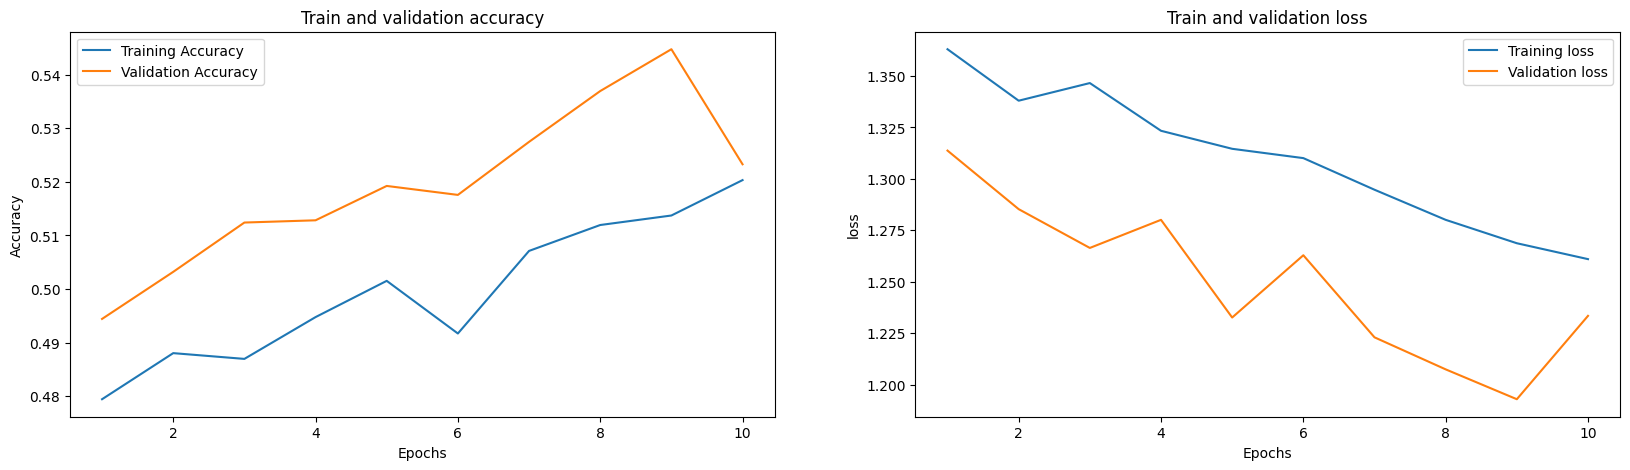

449/449 ━━━━━━━━━━━━━━━━━━━━ 369s 822ms/step - accuracy: 0.5323 - loss: 1.2338
113/113 ━━━━━━━━━━━━━━━━━━━━ 30s 267ms/step - accuracy: 0.5462 - loss: 1.2017
Train Accuracy : 53.45361828804016 
Test Accuracy : 54.471999406814575 


In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = np.arange(1,len(train_acc)+1)

fig , axes = plt.subplots(1,2, figsize = (20,5))
axes = axes.flatten()

axes[0].plot(epochs, train_acc, label = 'Training Accuracy')
axes[0].plot(epochs, val_acc, label = 'Validation Accuracy')
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Accuracy")
axes[0].set_title("Train and validation accuracy")
axes[0].legend()

axes[1].plot(epochs, train_loss, label = 'Training loss')
axes[1].plot(epochs, val_loss, label = 'Validation loss')
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("loss")
axes[1].set_title("Train and validation loss")
axes[1].legend()

plt.show()


train_loss , train_acc = model.evaluate(train_gen3)
test_loss , test_acc = model.evaluate(test_gen3)
print("Train Accuracy : {} ".format(train_acc*100))
print("Test Accuracy : {} ".format(test_acc*100))

113/113 ━━━━━━━━━━━━━━━━━━━━ 30s 256ms/step


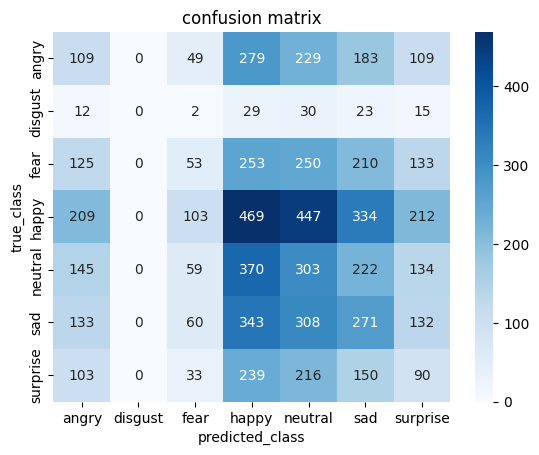

In [ ]:
step_per_epoch = train_gen3.samples//train_gen3.batch_size+1
test_steps = test_gen3.samples//test_gen3.batch_size+1

predicted_class = np.argmax(model.predict(test_gen3 , steps = test_steps), axis = 1)  # axis = 1 find row-wise max value index
true_class = test_gen3.classes
class_label = train_gen3.class_indices.keys()

cm = confusion_matrix(true_class,predicted_class)

sns.heatmap(cm , cmap = 'Blues', annot = True, fmt = "d", xticklabels = class_label, yticklabels = class_label)
plt.title("confusion matrix")
plt.xlabel("predicted_class")
plt.ylabel("true_class")
plt.show()


In [ ]:
report = classification_report(true_class,predicted_class , target_names = class_label)
print(report)

              precision    recall  f1-score   support

       angry       0.13      0.11      0.12       958
     disgust       0.00      0.00      0.00       111
        fear       0.15      0.05      0.08      1024
       happy       0.24      0.26      0.25      1774
     neutral       0.17      0.25      0.20      1233
         sad       0.19      0.22      0.21      1247
    surprise       0.11      0.11      0.11       831

    accuracy                           0.18      7178
   macro avg       0.14      0.14      0.14      7178
weighted avg       0.17      0.18      0.17      7178



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Model 4 : Transfer Leanring - ResNet50

In [ ]:
train_datagen4 = ImageDataGenerator(rescale = 1/255 ,
                                    rotation_range=40,  
                                    width_shift_range=0.2,  
                                    height_shift_range=0.2,  
                                    shear_range=0.2,  
                                    zoom_range=0.2,  
                                    horizontal_flip=True,  
                                    fill_mode='nearest',  
                                    )

train_gen4 = train_datagen4.flow_from_directory(
    "/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train",
    batch_size = 64,
    target_size = (224,224),
    subset = "training",
    class_mode = 'categorical',
    color_mode = "rgb",
    shuffle = True
)

test_datagen4 = ImageDataGenerator(rescale = 1/255)

test_gen4 = test_datagen4.flow_from_directory(
    "/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/test",
    target_size = (224,224),
    class_mode = "categorical",
    color_mode = "rgb",
    batch_size = 64
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


# Introducing Class wieghts for imbalanced data

In [ ]:
classes = train_gen4.classes

class_weights = compute_class_weight(class_weight = "balanced",
                                     classes = np.unique(classes),
                                     y = classes)

class_dict = dict(enumerate(class_weights))
class_dict

{0: 1.0266046844269623,
 1: 9.406618610747051,
 2: 1.0010460615781582,
 3: 0.5684387684387684,
 4: 0.8260394187886635,
 5: 0.8491274770777877,
 6: 1.293372978330405}

In [ ]:
ResNet50V2 = tf.keras.applications.ResNet50V2(input_shape = (224,224,3),
                                            include_top = False,
                                            weights = 'imagenet')

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
ResNet50V2.summary()

Model: "resnet50v2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_conv[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_bn    │ (None, 56, 56, 64)     │            256 │ pool1_pool[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_relu  │ (None, 56, 56, 64)     │              0 │ conv2_block1_preact_b… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,096 │ conv2_block1_preact_r… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_pad        │ (None, 58, 58, 64)     │              0 │ conv2_block1_1_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,864 │ conv2_block1_2_pad[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_preact_r… │
│ (Conv2D)             

 Total params: 23,564,800 (89.89 MB)

 Trainable params: 23,519,360 (89.72 MB)

 Non-trainable params: 45,440 (177.50 KB)

In [ ]:
len(ResNet50V2.layers)

190

In [ ]:
len(ResNet50V2.layers[:-50])

140

In [ ]:
#Freezing layers expect last 50 layers
for layer in ResNet50V2.layers[:-50]:
  layer.trainable = False


In [ ]:
ResNet50V2.summary()

Model: "resnet50v2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_conv[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_bn    │ (None, 56, 56, 64)     │            256 │ pool1_pool[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_relu  │ (None, 56, 56, 64)     │              0 │ conv2_block1_preact_b… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,096 │ conv2_block1_preact_r… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_pad        │ (None, 58, 58, 64)     │              0 │ conv2_block1_1_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,864 │ conv2_block1_2_pad[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_preact_r… │
│ (Conv2D)             

 Total params: 23,564,800 (89.89 MB)

 Trainable params: 16,352,256 (62.38 MB)

 Non-trainable params: 7,212,544 (27.51 MB)

In [ ]:
len(ResNet50V2.layers)

190

In [ ]:
model = Sequential([
                    ResNet50V2,
                    Dropout(0.25),
                    BatchNormalization(),
                    Flatten(),
                    Dense(64 , activation = 'relu'),
                    BatchNormalization(),
                    Dropout(0.5),
                    Dense(7 , activation = 'softmax')
                  ])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)              │ (None, 7, 7, 2048)          │      23,564,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 7, 7, 2048)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 7, 7, 2048)          │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       6,422,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,996,295 (114.43 MB)

 Trainable params: 22,779,527 (86.90 MB)

 Non-trainable params: 7,216,768 (27.53 MB)

In [ ]:
len(model.layers)

8

In [ ]:
optimizer = Adamax(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
cnn_path = '/content/FER_2013_Emotion_Detection/ResNet50_Transfer_Learning'
name = 'ResNet50_Transfer_Learning.keras'
chk_path = os.path.join(cnn_path, name)

# Callback to save the model checkpoint
checkpoint = ModelCheckpoint(filepath=chk_path,
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             monitor='val_loss')

# Callback for early stopping
earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=7,
                          verbose=1,
                          restore_best_weights=True)

# Callback to reduce learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=2,
                              verbose=1,
                              min_delta=0.00005)

# Callback to log training data to a CSV file
csv_logger = CSVLogger(os.path.join(cnn_path,'training.log'))

# Aggregating all callbacks into a list
callbacks = [checkpoint, earlystop, reduce_lr, csv_logger]

step_per_epoch = train_gen4.samples//train_gen4.batch_size+1
test_steps = test_gen4.samples//test_gen4.batch_size+1

In [ ]:
step_per_epoch
test_steps

113

In [ ]:
train_history = model.fit(
                          train_gen4,
                          epochs=50,
                          validation_data=test_gen4,
                          class_weight=class_dict,
                          callbacks = callbacks
                        )

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 884ms/step - accuracy: 0.1815 - loss: 2.7522
Epoch 1: val_loss improved from inf to 1.87322, saving model to /content/FER_2013_Emotion_Detection/ResNet50_Transfer_Learning/ResNet50_Transfer_Learning.keras
449/449 ━━━━━━━━━━━━━━━━━━━━ 463s 941ms/step - accuracy: 0.1815 - loss: 2.7516 - val_accuracy: 0.3346 - val_loss: 1.8732 - learning_rate: 1.0000e-04
Epoch 2/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 854ms/step - accuracy: 0.2695 - loss: 2.1273
Epoch 2: val_loss improved from 1.87322 to 1.60694, saving model to /content/FER_2013_Emotion_Detection/ResNet50_Transfer_Learning/ResNet50_Transfer_Learning.keras
449/449 ━━━━━━━━━━━━━━━━━━━━ 410s 902ms/step - accuracy: 0.2695 - loss: 2.1272 - val_accuracy: 0.4202 - val_loss: 1.6069 - learning_rate: 1.0000e-04
Epoch 3/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 842ms/step - accuracy: 0.3093 - loss: 1.9266
Epoch 3: val_loss improved from 1.60694 to 1.50743, saving model to /content/FER_2013_Emotion_Detection/ResNet50_Transfer_Lea

KeyboardInterrupt: 

In [ ]:
import keras
model01 = keras.saving.load_model("/content/test_model (1).keras")

In [ ]:
train_history = model01.fit(
                          train_gen4,
                          epochs=26,
                          validation_data=test_gen4,
                          class_weight=class_dict,
                          callbacks = callbacks
                        )

Epoch 1/26


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 882ms/step - accuracy: 0.6047 - loss: 1.0334
Epoch 1: val_loss improved from inf to 1.01461, saving model to /content/FER_2013_Emotion_Detection/ResNet50_Transfer_Learning/ResNet50_Transfer_Learning.keras
449/449 ━━━━━━━━━━━━━━━━━━━━ 459s 938ms/step - accuracy: 0.6047 - loss: 1.0334 - val_accuracy: 0.6346 - val_loss: 1.0146 - learning_rate: 1.0000e-04
Epoch 2/26
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 790ms/step - accuracy: 0.6068 - loss: 1.0292
Epoch 2: val_loss improved from 1.01461 to 1.00968, saving model to /content/FER_2013_Emotion_Detection/ResNet50_Transfer_Learning/ResNet50_Transfer_Learning.keras
449/449 ━━━━━━━━━━━━━━━━━━━━ 433s 835ms/step - accuracy: 0.6068 - loss: 1.0292 - val_accuracy: 0.6349 - val_loss: 1.0097 - learning_rate: 1.0000e-04
Epoch 3/26
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 783ms/step - accuracy: 0.6061 - loss: 1.0238
Epoch 3: val_loss did not improve from 1.00968
449/449 ━━━━━━━━━━━━━━━━━━━━ 375s 818ms/step - accuracy: 0.6061 - loss: 1.0238

In [ ]:
train_acc = train_history.history['accuracy']
val_acc = train_history.history['val_accuracy']

train_loss = train_history.history['loss']
val_loss = train_history.history['val_loss']

epochs = np.arange(1,len(train_acc)+1)

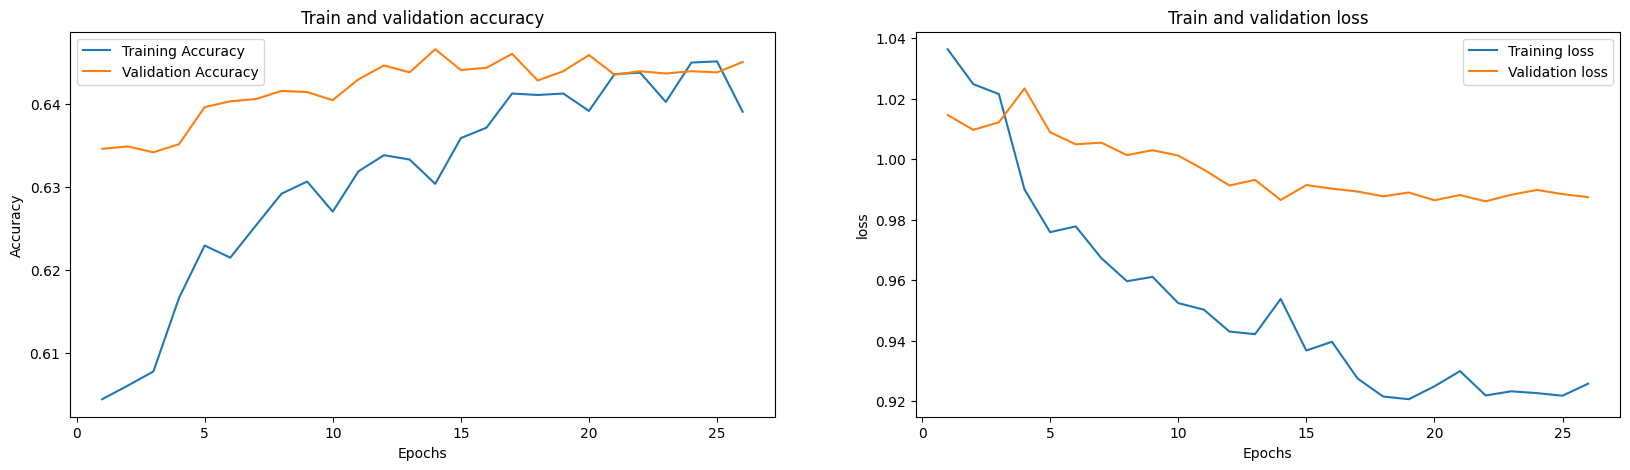

449/449 ━━━━━━━━━━━━━━━━━━━━ 348s 775ms/step - accuracy: 0.6775 - loss: 0.8886
113/113 ━━━━━━━━━━━━━━━━━━━━ 15s 132ms/step - accuracy: 0.6495 - loss: 0.9731
Train Accuracy : 67.86025166511536 
Test Accuracy : 64.39119577407837 


In [ ]:
fig , axes = plt.subplots(1,2, figsize = (20,5))
axes = axes.flatten()

axes[0].plot(epochs, train_acc, label = 'Training Accuracy')
axes[0].plot(epochs, val_acc, label = 'Validation Accuracy')
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Accuracy")
axes[0].set_title("Train and validation accuracy")
axes[0].legend()

axes[1].plot(epochs, train_loss, label = 'Training loss')
axes[1].plot(epochs, val_loss, label = 'Validation loss')
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("loss")
axes[1].set_title("Train and validation loss")
axes[1].legend()

plt.show()


train_loss , train_acc = model01.evaluate(train_gen4)
test_loss , test_acc = model01.evaluate(test_gen4)
print("Train Accuracy : {} ".format(train_acc*100))
print("Test Accuracy : {} ".format(test_acc*100))

113/113 ━━━━━━━━━━━━━━━━━━━━ 20s 147ms/step


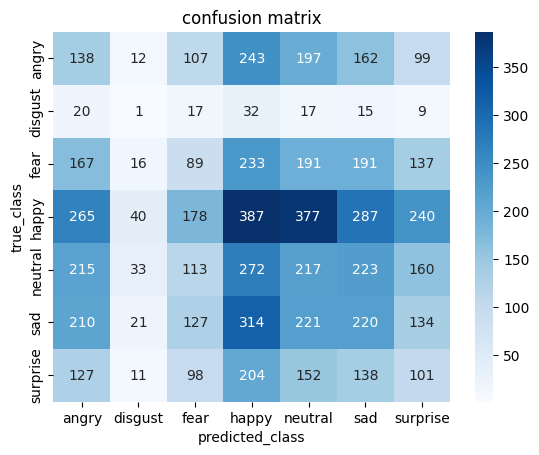

In [ ]:
step_per_epoch = train_gen4.samples//train_gen4.batch_size+1
test_steps = test_gen4.samples//test_gen4.batch_size+1

predicted_class = np.argmax(model01.predict(test_gen4 , steps = test_steps), axis = 1)  # axis = 1 find row-wise max value index
true_class = test_gen4.classes
class_label = train_gen4.class_indices.keys()

cm = confusion_matrix(true_class,predicted_class)

sns.heatmap(cm , cmap = 'Blues', annot = True, fmt = "d", xticklabels = class_label, yticklabels = class_label)
plt.title("confusion matrix")
plt.xlabel("predicted_class")
plt.ylabel("true_class")
plt.show()

In [ ]:
true_labels = test_gen4.classes
preds = model01.predict(test_gen4, steps=len(test_gen4))
pred_labels = np.argmax(preds, axis=1)
classes=list(test_gen4.class_indices.keys())

113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 123ms/step


# AUC ROC plot for each class


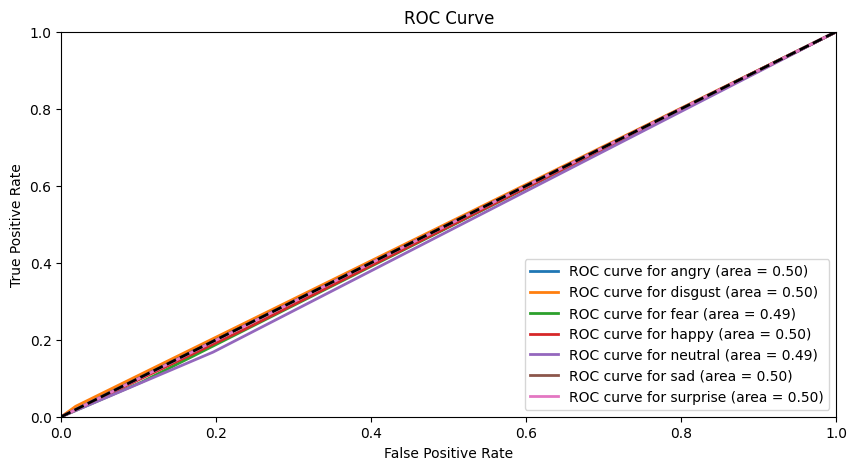

In [ ]:
y_encoded = pd.get_dummies(true_labels).astype(int).values
preds_encoded = pd.get_dummies(pred_labels).astype(int).values

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_encoded[:,i], preds_encoded[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10,5))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f"ROC curve for {classes[i]} (area = {roc_auc[i]:0.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

In [ ]:
import keras
model02 = keras.saving.load_model("/content/test_model.keras")

In [ ]:
optimizer = Adamax(learning_rate=0.0001)

model02.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
train_history = model02.fit(
                          train_gen4,
                          epochs=15,
                          validation_data=test_gen4,
                          class_weight=class_dict,
                          callbacks = callbacks
                        )

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 818ms/step - accuracy: 0.6303 - loss: 0.9616
Epoch 1: val_loss improved from inf to 1.01409, saving model to /content/FER_2013_Emotion_Detection/ResNet50_Transfer_Learning/ResNet50_Transfer_Learning.keras
449/449 ━━━━━━━━━━━━━━━━━━━━ 426s 872ms/step - accuracy: 0.6303 - loss: 0.9616 - val_accuracy: 0.6446 - val_loss: 1.0141 - learning_rate: 1.0000e-04
Epoch 2/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 795ms/step - accuracy: 0.6319 - loss: 0.9534
Epoch 2: val_loss did not improve from 1.01409
449/449 ━━━━━━━━━━━━━━━━━━━━ 372s 828ms/step - accuracy: 0.6319 - loss: 0.9534 - val_accuracy: 0.6390 - val_loss: 1.0261 - learning_rate: 1.0000e-04
Epoch 3/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 799ms/step - accuracy: 0.6456 - loss: 0.9267
Epoch 3: val_loss improved from 1.01409 to 0.98652, saving model to /content/FER_2013_Emotion_Detection/ResNet50_Transfer_Learning/ResNet50_Transfer_Learning.keras
449/449 ━━━━━━━━━━━━━━━━━━━━ 376s 838ms/step - accuracy: 0.6456 - l

In [ ]:
train_acc = train_history.history['accuracy']
val_acc = train_history.history['val_accuracy']

train_loss = train_history.history['loss']
val_loss = train_history.history['val_loss']

epochs = np.arange(1,len(train_acc)+1)

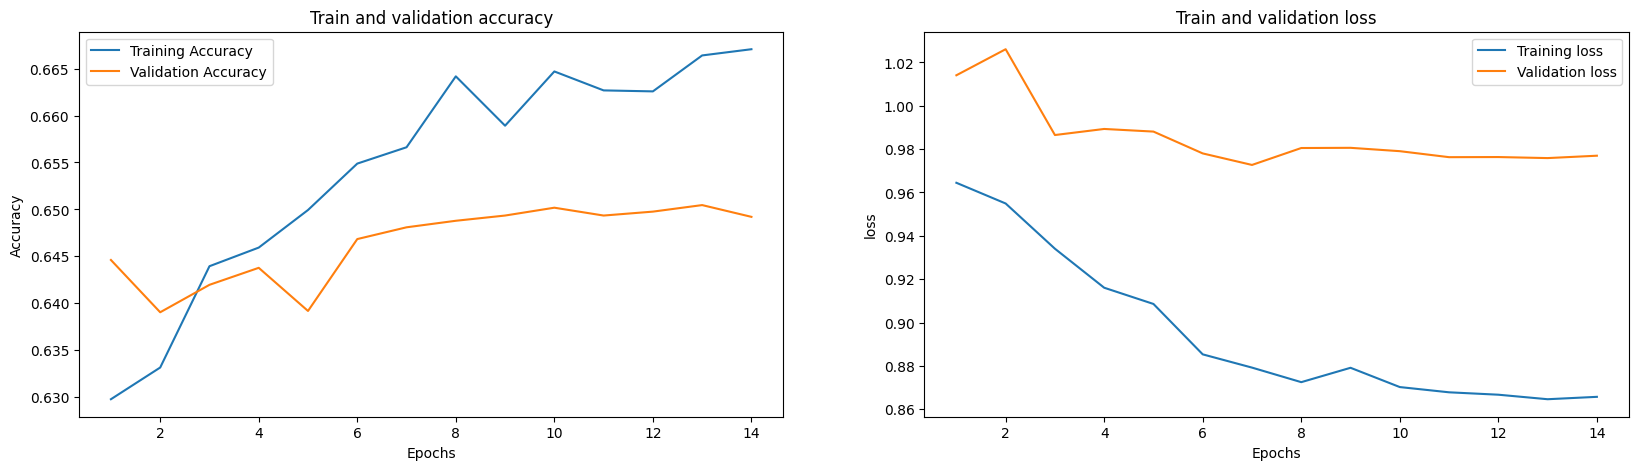

449/449 ━━━━━━━━━━━━━━━━━━━━ 361s 803ms/step - accuracy: 0.6945 - loss: 0.8471
113/113 ━━━━━━━━━━━━━━━━━━━━ 16s 137ms/step - accuracy: 0.6468 - loss: 0.9778
Train Accuracy : 69.57051753997803 
Test Accuracy : 64.80913758277893 


In [ ]:
fig , axes = plt.subplots(1,2, figsize = (20,5))
axes = axes.flatten()

axes[0].plot(epochs, train_acc, label = 'Training Accuracy')
axes[0].plot(epochs, val_acc, label = 'Validation Accuracy')
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Accuracy")
axes[0].set_title("Train and validation accuracy")
axes[0].legend()

axes[1].plot(epochs, train_loss, label = 'Training loss')
axes[1].plot(epochs, val_loss, label = 'Validation loss')
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("loss")
axes[1].set_title("Train and validation loss")
axes[1].legend()

plt.show()


train_loss , train_acc = model02.evaluate(train_gen4)
test_loss , test_acc = model02.evaluate(test_gen4)
print("Train Accuracy : {} ".format(train_acc*100))
print("Test Accuracy : {} ".format(test_acc*100))

In [ ]:
true_labels = test_gen4.classes
preds = model02.predict(test_gen4, steps=len(test_gen4))
pred_labels = np.argmax(preds, axis=1)
classes=list(test_gen4.class_indices.keys())

113/113 ━━━━━━━━━━━━━━━━━━━━ 16s 137ms/step


In [ ]:
model02.save("test_model.keras")

113/113 ━━━━━━━━━━━━━━━━━━━━ 24s 163ms/step


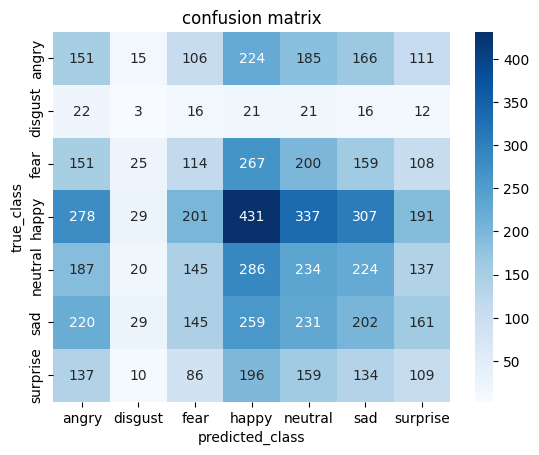

In [ ]:
step_per_epoch = train_gen4.samples//train_gen4.batch_size+1
test_steps = test_gen4.samples//test_gen4.batch_size+1

predicted_class = np.argmax(model02.predict(test_gen4 , steps = test_steps), axis = 1)  # axis = 1 find row-wise max value index
true_class = test_gen4.classes
class_label = train_gen4.class_indices.keys()

cm = confusion_matrix(true_class,predicted_class)

sns.heatmap(cm , cmap = 'Blues', annot = True, fmt = "d", xticklabels = class_label, yticklabels = class_label)
plt.title("confusion matrix")
plt.xlabel("predicted_class")
plt.ylabel("true_class")
plt.show()

In [ ]:
!pip3 install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.8/321.8 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 71.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import gradio as gr
import tensorflow as tf
import numpy as np
from PIL import Image
import cv2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
emotion_labels = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Neutral', 5: 'Sad', 6: 'Surprise'}

In [ ]:
def prepare_img(input_img):
  img = input_img.resize((224, 224))
  img =  img_to_array(img)
  img = np.expand_dims(img, axis = 0)
  img = img/255
  return img

In [ ]:
def prediction(img):
  prepared_img = prepare_img(img)
  probability = model01.predict(prepared_img)[0]
  prediction = emotion_labels[np.argmax(probability)]

  return prediction

In [ ]:
interface = gr.Interface(
    fn=prediction,
    inputs=gr.Image(type="pil"),
    outputs="text",
    title="Emotion Detection",
    description="Upload an image and see the predicted emotion."
)

In [ ]:
interface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5db32e998b8a131225.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
